# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [3]:
data0 = pd.read_csv('geo_data_0.csv')

In [4]:
data1 = pd.read_csv('geo_data_1.csv')

In [5]:
data2 = pd.read_csv('geo_data_2.csv')

In [6]:
data = [data0, data1, data2]

In [6]:
for i in range(len(data)):   
    print(data[i].head(5))

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


где: id — уникальный идентификатор скважины;<br>
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);<br>
product — объём запасов в скважине (тыс. баррелей).<br>

В данных по 5 столбцов, 100 000 строк. Пропусков данных не обнаружено. 

product - целевой признак 

Удалим столбец id во всех таблицах, так как оне не несет значимости: 

In [7]:
for i in range(len(data)):   # сделаем удаление столбца в цикле и выведем значения (чтобы проверить)
    data[i] = data[i].drop(columns='id')
    print(data[i].head(5))

         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
3 -0.032172  0.139033  2.978566  168.620776
4  1.988431  0.155413  4.751769  154.036647
          f0         f1        f2     product
0 -15.001348  -8.276000 -0.005876    3.179103
1  14.272088  -3.475083  0.999183   26.953261
2   6.263187  -5.948386  5.001160  134.766305
3 -13.081196 -11.506057  4.999415  137.945408
4  12.702195  -8.147433  5.004363  134.766305
         f0        f1        f2     product
0 -1.146987  0.963328 -0.828965   27.758673
1  0.262778  0.269839 -2.530187   56.069697
2  0.194587  0.289035 -5.586433   62.871910
3  2.236060 -0.553760  0.930038  114.572842
4 -0.515993  1.716266  5.899011  149.600746


## Обучение и проверка модели

Разобъем данные на выборки (обучающую и валидационную):

In [8]:
target = []
features = []
features_train_all = []
features_valid_all = []
target_train_all = []
target_valid_all = []
predicted_valid_all = []

In [9]:
for k in range(len(data)):
    target.append(data[k]['product'])
    features.append(data[k].drop(columns = 'product'))
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features[k], target[k], test_size=0.25, random_state=12345)  # разобъем данные на обучающую и валидационную выборки в соотношении 75:25.
    
    model = LinearRegression() 
    model.fit(features_train, target_train) # Обучим модель и сделаем предсказания на валидационной выборке
    predicted_valid = model.predict(features_valid) # Сохраним предсказания и правильные ответы на валидационной выборке
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = mse** 0.5
    features_train.append(features_train)   
    print("Регион №", k+1)
    print('Обучающая выборка:',features_train.shape, target_train.shape)
    print('Валидационная выборка:', features_valid.shape, target_valid.shape)
    print("Средний запас предсказанного сырья", predicted_valid.mean())
    print("RMSE",k, '=', rmse) # Напечатаем средний запас предсказанного сырья и RMSE модели по регионам
    print()
    features_train_all.append(features_train) # сохраним выборки для каждого региона
    features_valid_all.append(features_valid)
    target_train_all.append(target_train)
    target_valid_all.append(target_valid)
    predicted_valid_all.append(predicted_valid) # сохраним предсказания
    

Регион № 1
Обучающая выборка: (75000, 3) (75000,)
Валидационная выборка: (25000, 3) (25000,)
Средний запас предсказанного сырья 92.59256778438035
RMSE 0 = 37.5794217150813

Регион № 2
Обучающая выборка: (75000, 3) (75000,)
Валидационная выборка: (25000, 3) (25000,)
Средний запас предсказанного сырья 68.728546895446
RMSE 1 = 0.893099286775617

Регион № 3
Обучающая выборка: (75000, 3) (75000,)
Валидационная выборка: (25000, 3) (25000,)
Средний запас предсказанного сырья 94.96504596800489
RMSE 2 = 40.02970873393434



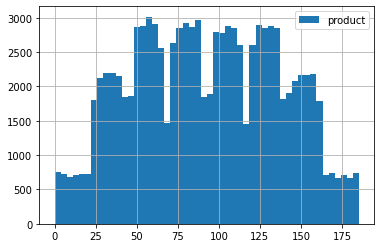

In [10]:
data0['product'].hist(bins=50,  legend=True) # Гистограмма распределения сырья в первом регионе
plt.show()

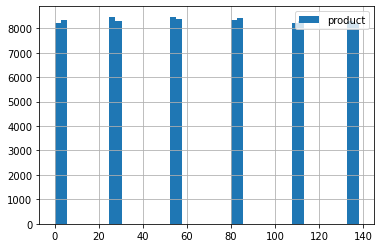

In [11]:
data1['product'].hist(bins=50,  legend=True)
plt.show()

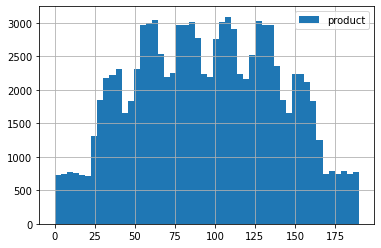

In [12]:
data2['product'].hist(bins=50,  legend=True)
plt.show()

Из данных, полученных при расчетах среднего запаса предсказанного сырья, среднеквадратичной ошибки (RMSE), и данных графиков распределений видно, что данные по второй выборке (второй регион) распределены не нормально. Этим объяснюется такое расхождение в стреднеквадратичной ошибке для второго региона. <br>
По данным третьего региона средний запас предсказанного сырья больше, но и RMSE больше. 

Выведем ранее сохраненные выборки:

In [13]:
print('Обучающие выборки первого региона:')
print(features_train_all[0])
print(target_train_all[0])
print()
print('Валидационные выборки первого региона:')
print(features_valid_all[0])
print(target_valid_all[0])

Обучающие выборки первого региона:
             f0        f1         f2
27212  0.022450  0.951034   2.197333
7866   1.766731  0.007835   6.436602
62041  0.724514  0.666063   1.840177
70185 -1.104181  0.255268   2.026156
82230 -0.635263  0.747990   6.643327
...         ...       ...        ...
4094   1.863680 -0.298123   1.621324
85412 -1.162682 -0.014822   6.819941
2177   0.862688 -0.403776   1.867662
77285  0.846235 -0.489533   1.058786
86498  2.019850  0.263887  11.497239

[75000 rows x 3 columns]
27212    147.370612
7866     147.630053
62041     77.696728
70185     55.210501
82230    113.891723
            ...    
4094     124.380793
85412    144.874913
2177     134.967255
77285     64.494357
86498    151.514894
Name: product, Length: 75000, dtype: float64

Валидационные выборки первого региона:
             f0        f1        f2
71751  0.948970 -0.057547  2.095727
80493  0.992974  0.206671 -0.142278
2655   1.199854 -0.563356 -1.852991
53233  0.691422 -0.433347  0.564974
91141  0.4

In [14]:
print('Предсказания для первого региона:')
print(predicted_valid_all[0])

Предсказания для первого региона:
[ 95.89495185  77.57258261  77.89263965 ...  61.50983303 118.18039721
 118.16939229]


Аналогично для каждого региона. 

In [15]:
print('Средний предсказанный запас предсказанного сырья в регионе 1:', predicted_valid_all[0].mean())
print('Средний предсказанный запас предсказанного сырья в регионе 2:', predicted_valid_all[1].mean())
print('Средний предсказанный запас предсказанного сырья в регионе 3:', predicted_valid_all[2].mean())

Средний предсказанный запас предсказанного сырья в регионе 1: 92.59256778438035
Средний предсказанный запас предсказанного сырья в регионе 2: 68.728546895446
Средний предсказанный запас предсказанного сырья в регионе 3: 94.96504596800489


## Подготовка к расчёту прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

При условии того, что выделяют 10 млд на разработку скважин в регионе, вычислим сколько будет приходиться на 1 скважину (200 скважен в регионе):  

In [16]:
budget_for_one = 10 * 10**9/200
budget_for_one

50000000.0

При условии, что доход с 1 скважины 450 тыс, вычислим количество сырья, чтобы быть в безубытке: 

In [17]:
count_bar=budget_for_one/450000
print('Объем сырья (расчет) для безубыточной разработки скважины, тыс баррелей:', count_bar)

Объем сырья (расчет) для безубыточной разработки скважины, тыс баррелей: 111.11111111111111


Сравним полученный объём сырья со средним запасом в каждом регионе.

In [18]:
print('Необходимо для безубыточной добычи в регионе 1:', count_bar - predicted_valid_all[0].mean())
print('Необходимо для безубыточной добычи в регионе 2:', count_bar - predicted_valid_all[1].mean())
print('Необходимо для безубыточной добычи в регионе 3:', count_bar - predicted_valid_all[2].mean())

Необходимо для безубыточной добычи в регионе 1: 18.518543326730764
Необходимо для безубыточной добычи в регионе 2: 42.38256421566511
Необходимо для безубыточной добычи в регионе 3: 16.146065143106227


Добыча в регионе 2 является более затратной. 

## Расчёт прибыли и рисков 

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

In [19]:
price = 450*10**3
budget = 10*10**9

In [20]:
def profit(target, predictions, count):
    profit=0
    probs_sorted = predictions.sort_values(ascending=False).head(200) 
    selected = target[probs_sorted.index][:count] # выбрали скважины с максимальными значениями предсказаний
    profit = (price*selected.sum()-budget)/budget # рассчитали прибыль для полученного объёма сырья
    return profit  

In [21]:
sample_target = []
for n in range(len(data)):
    sample_tar = target_valid_all[n].reset_index(drop=True)
    sample_target.append(sample_tar)  

In [22]:
sample_predictions = []
for o in range(len(data)):
    sample_pred = pd.Series(predicted_valid_all[o]) 
    sample_predictions.append(sample_pred)  

In [23]:
profit_values = []
for j in range(len(data)): # Для каждого региона
    profit_values = []
    state = np.random.RandomState(12345)  
    
    for i in range(1000): # Применим Бутстреп, используем 1000 подвыборок
        target_sample = sample_target[j].sample(500, replace=True, random_state=state)
        predictions_sample =sample_predictions[j][target_sample.index]
        result=profit(target_sample, predictions_sample, 200)
        profit_values.append(result)
        
    profit_values = pd.Series(profit_values)
    
    persent_risk = (profit_values[profit_values<0].count())/len(profit_values)*100
    
    mean = profit_values.mean()
    lower = profit_values.quantile(0.025)
    upper = profit_values.quantile(0.975)
    print()
    print(f'Для {j+1} региона:')
    print(f'Средняя прибыль по прогнозу равняется {mean} млн рублей')
    print(f'С вероятностью 95% прибыль составит от {lower} до {upper} млн рублей')
    print(f'Риск убытков составляет {persent_risk} %')
   


Для 1 региона:
Средняя прибыль по прогнозу равняется 0.04259385269105924 млн рублей
С вероятностью 95% прибыль составит от -0.010209009483793654 до 0.09479763533583689 млн рублей
Риск убытков составляет 6.0 %

Для 2 региона:
Средняя прибыль по прогнозу равняется 0.05152227734432899 млн рублей
С вероятностью 95% прибыль составит от 0.006887322537050176 до 0.09315475912570495 млн рублей
Риск убытков составляет 1.0 %

Для 3 региона:
Средняя прибыль по прогнозу равняется 0.04350083627827557 млн рублей
С вероятностью 95% прибыль составит от -0.012888054732978903 до 0.09697069541802661 млн рублей
Риск убытков составляет 6.4 %


# Вывод

По условиям задачи после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Такому условию удовлетворяет лишь один регион 2. Для данного региона самый малый риск убытков, наибольшая прибыль, а также данные по 2 региону обнадают наименьшей среднеквадратичной ошибкой. 


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован